In [1]:
# We will load all required modules first.
try:
    from dstaster import *
except:
    !pip install wget

    import wget
    url = 'https://raw.githubusercontent.com/microgravitas/dstaster/master/tasks/dstaster.py'
    wget.download(url)

We first load our data alongside the labels provided by the title model we discussed in the last step. This cell also defines the words used in that model: `port_words` contains the words that indicate a portrait, `land_words` the words that indicate a landscape.

In [2]:
# Load data
port_words = {'portrait', 'nude', 'bust', 'self-portrait', 'figure',
                'gentleman', 'mr', 'lord', 'count', 'sir', 'man', 'boy', 
                'dr', 'colonel',
                'mrs', 'miss', 'lady', 'dame', 'countess', 'duchess', 'woman', 'women', 'girl', 
                'husband', 'wife', 'father', 'mother', 'son', 'daughter', 'family',
                'brother', 'sister', 'child'}

land_words = {'view', 'landscape', 'house', 'church', 'mill',
              'church', 'cathedral', 'castle', 
              'bridge', 'river', 'lake', 'canal', 'channel', 'pier', 'harbour', 'thames',
              'boat', 'ship', 'beach', 'sea', 'bay', 'coast', 'cliff',
              'tree', 'flower', 'forest', 'wood', 'garden', 'park', 'meadow', 'field', 'farm',
              'mountain', 'hill', 
              'morning', 'evening', 'sunset', 'sunrise',
              'winter', 'summer', 'autumn', 'spring'}

title_model = pd.read_csv('https://raw.githubusercontent.com/microgravitas/dstaster/master/tate/title_model.csv', index_col=0).rename(columns={"model": "title_model"})
collection = pd.read_csv("https://raw.githubusercontent.com/microgravitas/dstaster/master/tate/paintings.csv", index_col=0)
collection = collection.join(title_model)

collection['title'] = collection['title'].str.lower()

collection

,artist,title,year,groundtruth,height,width,title_model
T13896,John Constable,salisbury cathedral from the meadows,1831,L,1537,1920,O
T05010,Pablo Picasso,weeping woman,1937,O,608,500,P
N05915,Pablo Picasso,bust of a woman,1909,P,727,600,P
N00530,Joseph Mallord William Turner,snow storm - steam-boat off a harbour’s mouth,1842,L,914,1219,L
T00598,Richard Dadd,the fairy feller’s master-stroke,1855,O,540,394,O
...,...,...,...,...,...,...,...
N05609,Maurice Sterne,mexican church interior,1934,O,1283,1022,L
T14823,Unknown artist,leon trotsky,1980,P,510,480,O
AL00397,Louise Bourgeois,untitled,1946,O,660,1116,O
T14824,Unknown artist,leon trotsky,1980,P,638,511,O


<h2>Analysing the title model</h2>

We would like to improve our title model further. Let us recall how the model works: if the title of painting contains at least one word from <code>port_words</code> (see cell above) then we decide that it is a portrait and assign to it the label P. If it contains a words from <code>land_words</code> we decide that it is a landscape painting and assign the label L. Otherwise, we label it O.

So, in order to improve our model we could try to add more words to these lists! Instead of wild guessing, let's have a peek at the ground truth of our data and see where our model is failing. The following code cell will find all paintings that we label O but which are actually either L or P according to the ground truth. We then collect the titles of those paintings and output the 15 most common words (excluding some common words like &lsquo;the&rsquo; &lsquo;and&rsquo;, etc.).


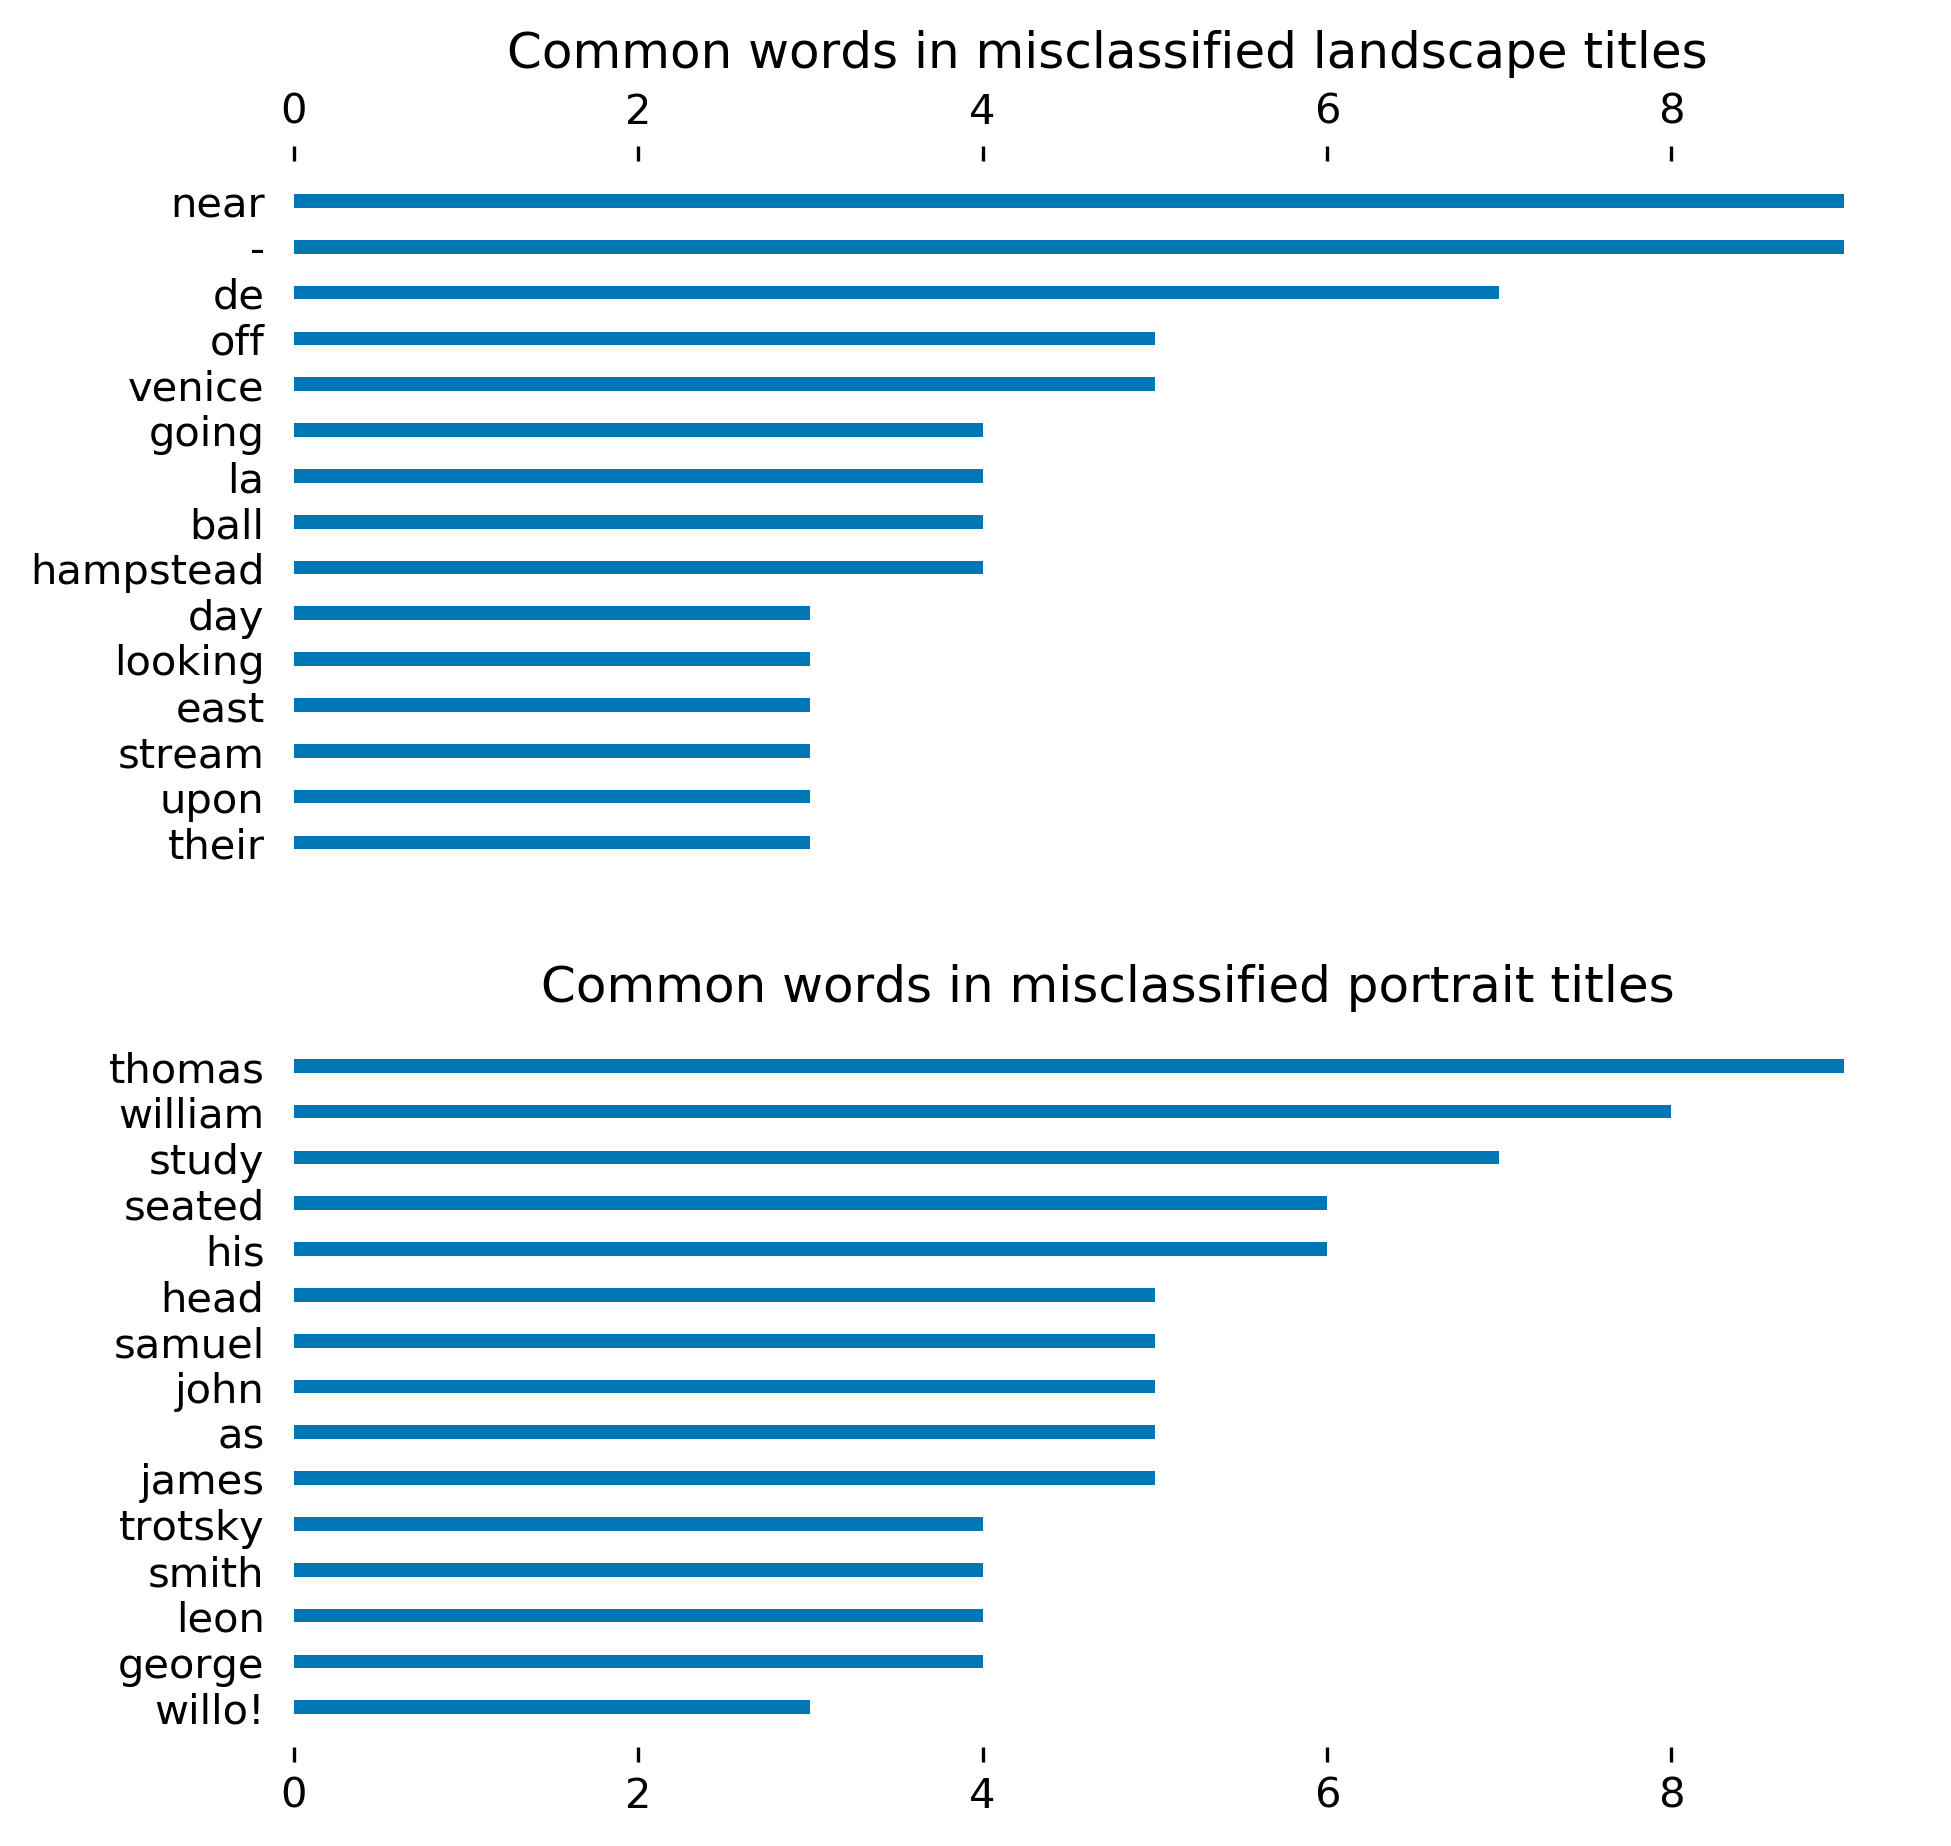

In [3]:
stop_words = {'the', 'and', 'with', 'from', 'for', 'untitled', 'of', 
              'in', 'at', 'on', 'a', 'an', 'st', 'to', 'by'}
    

fland = (collection['title_model'] == 'O') & (collection['groundtruth'] == 'L')
fport = (collection['title_model'] == 'O') & (collection['groundtruth'] == 'P')

fig, axes = plt.subplots(2, 1, dpi=300, figsize=(7,7))
ax1, ax2 = axes

# Some chart options to make it look nice
for ax in axes:
    for s in ax.spines:
        ax.spines[s].set_visible(False)
    ax.tick_params(axis='y', which='both', left=False)
ax1.tick_params(axis='x', which='both', top=True, labeltop=True,
                bottom=False, labelbottom=False)

counts = collection[fland]['title'].str.split(expand=True).stack().value_counts()
counts = counts[~counts.index.isin(land_words|stop_words)][:15][::-1]
ax1.barh(counts.index, counts.values, height=.3)
ax1.set_title('Common words in misclassified landscape titles')

counts = collection[fport]['title'].str.split(expand=True).stack().value_counts()
counts = counts[~counts.index.isin(port_words|stop_words)][:15][::-1]
ax2.barh(counts.index, counts.values, height=.3)
ax2.set_title('Common words in misclassified portrait titles')

pass

<div class="task">
    <div class="no">1</div>
    <div class="text">
        Use the plot above to decide on <b>additional</b> portrait and landscape words. Put those words into the lists in the cells below and then run the cell after that to see how your modified model compares to the original title model.
    </div>
</div>

<div class="note">Tip: if you are unsure how to do this, have a look at the hinds below.</div>

<ol class="hints">
    <li><div>You need to add words enclose in single or double quotes, like 'study' or "study".
    </div></li>
    <li><div>The words need to be separated by commas inside the square brackets.</div>
    </li>    
    <li><div>For example, if you decided that our landscape words should also contain the words "scene" and "day", you would write</div>
        <code>more_land_words = ["scene", "day"]</code>
    </li>    
<li>

In [4]:
more_land_words = [] # Add words to this list
more_port_words = [] # Add words to this list

In [5]:
try:
    if collection is None: 
        raise NameError
except NameError:
    error("<code>collection</code> undefined.",
          "Did you run very first code cell?")
    
try:
    if more_land_words is None: 
        raise NameError
except NameError:
    error("<code>more_land_words</code> undefined.",
          "Did you run the cell above?")    

try:
    if more_port_words is None: 
        raise NameError
except NameError:
    error("<code>more_port_words</code> undefined.",
          "Did you run the cell above?")    

try:
    if len(more_land_words) == 0: 
        raise NameError
except NameError:
    error("<code>more_land_words</code> is empty.",
          "Please add words to <code>more_land_words</code> in the cell above and run it.")
    
try:
    if len(more_port_words) == 0: 
        raise NameError
except NameError:
    error("<code>more_port_words</code> is empty.",
          "Please add words to <code>more_port_words</code> in the cell above and run it.")
        
    
print("You chose the following additional words")
print(" landscape:", more_land_words)
print("  portrait:", more_port_words)

titles = collection['title']
iport = titles.str.count('|'.join(port_words|set(more_port_words))) >= 1
iland = titles.str.count('|'.join(land_words|set(more_land_words))) >= 1
irest = iport & iland
iport &= ~irest
iland &= ~irest

collection['title_model_improved'] = 'O'
collection.loc[iland,'title_model_improved'] = 'L'
collection.loc[iport,'title_model_improved'] = 'P'

truth = collection['groundtruth']

fig, axes = plt.subplots(1, 2, figsize=(11,5), dpi=120)
for model, ax, bar in zip(['title_model', 'title_model_improved'], axes, [False, True]):
    pred = collection[model]
        
    plot_confusion_matrix(truth, pred, 'LPO', ax)
    ax.set_title(model.replace("_", " ").capitalize())

<div class="task">
    <div class="no">2</div>
    <div class="text">
        Try to find the best possible choice of <B>three</b> additional words
        for both landscape and portrait words by using the above code cells. Share your findings with the rest of the course!
    </div>
</div>
